In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [2]:
pres = pd.read_csv("Cleanup/p_all.csv")
bgc = pd.read_csv("Cleanup/b_all.csv")
stategroups = pd.read_csv("Cleanup/stategroups.csv")

In [3]:
bgc08 = bgc.loc[bgc["year"] == 2008]
pres08 = pres.loc[pres["Year"] == 2008]
bgc12 = bgc.loc[bgc["year"] == 2012]
pres12 = pres.loc[pres["Year"] == 2012]

In [4]:
bgc_bo = bgc08.append(bgc12, ignore_index=True)
bgc_bo = bgc_bo.loc[bgc_bo["state"] != "Total"]
pres_bo = pres08.append(pres12, ignore_index=True)
pres_bo = pres_bo.loc[pres_bo["State"] != "Total"]
bgc_bo = bgc_bo.rename(columns={"state":"State","year":"Year"})
bgc_bo

,State,Year,totals,pct
0,AL,2008,299432,6.156991
1,AK,2008,61729,-1.537365
2,AZ,2008,208721,3.189904
3,AR,2008,191799,9.407244
4,CA,2008,780398,0.995133
...,...,...,...,...
98,VA,2012,448754,11.068871
99,WA,2012,519209,8.072472
100,WV,2012,225580,10.360848
101,WI,2012,469375,-7.390040


In [5]:
compare = bgc_bo.merge(pres_bo,"outer")
compare

,State,Year,totals,pct,Republican,Democratic,Others,Election,PercentD,Dem Win,Change
0,AL,2008,299432,6.156991,1266546,813479,19794,Pres,38.740434,False,1.896697
1,AK,2008,61729,-1.537365,193841,123594,8762,Pres,37.889374,False,2.372512
2,AZ,2008,208721,3.189904,1230111,1034707,28657,Pres,45.115251,False,0.718418
3,AR,2008,191799,9.407244,638017,422310,26290,Pres,38.864660,False,-5.682971
4,CA,2008,780398,0.995133,5011781,8274473,275646,Pres,61.012638,True,6.709262
...,...,...,...,...,...,...,...,...,...,...,...
97,VA,2012,448754,11.068871,1822522,1971820,60147,Pres,51.156457,True,-1.473013
98,WA,2012,519209,8.072472,1290670,1755396,79450,Pres,56.163398,True,-1.489494
99,WV,2012,225580,10.360848,417655,238269,14514,Pres,35.539304,False,-7.050446
100,WI,2012,469375,-7.390040,1407966,1620985,39483,Pres,52.827762,True,-3.390025


In [6]:
blue_states = stategroups.loc[stategroups["Group"] == "Blue","State"]
blue_states

4     CA
6     CT
7     DC
8     DE
11    HI
14    IL
19    MA
20    MD
21    ME
23    MN
31    NJ
34    NY
37    OR
39    RI
46    VT
47    WA
Name: State, dtype: object

In [7]:
swing_states = stategroups.loc[stategroups["Group"] == "Swing","State"]
swing_states

5     CO
9     FL
12    IA
15    IN
22    MI
27    NC
30    NH
32    NM
33    NV
35    OH
38    PA
45    VA
48    WI
Name: State, dtype: object

In [8]:
red_states = stategroups.loc[stategroups["Group"] == "Red","State"]
red_states

0     AK
1     AL
2     AR
3     AZ
10    GA
13    ID
16    KS
17    KY
18    LA
24    MO
25    MS
26    MT
28    ND
29    NE
36    OK
40    SC
41    SD
42    TN
43    TX
44    UT
49    WV
50    WY
Name: State, dtype: object

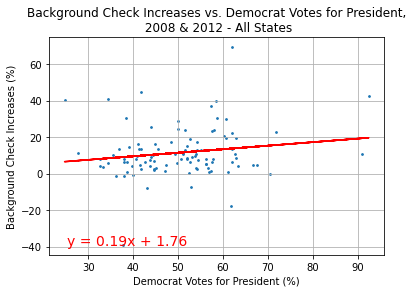

In [9]:
x_values = compare["PercentD"]
y_values = compare["pct"]

plt.scatter(compare["PercentD"],compare["pct"],s=3)
plt.title("Background Check Increases vs. Democrat Votes for President,\n 2008 & 2012 - All States")
plt.ylabel("Background Check Increases (%)")
plt.xlabel("Democrat Votes for President (%)")
plt.grid()
slope, intercept, r_value, p_value, std_err = linregress(x_values,y_values)
plt.plot(x_values, intercept + slope*x_values, 'r')
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(min(x_values)+0.5,min(y_values)),fontsize=14,color="red")
plt.show()

In [10]:
print(f"The r-squared is {r_value * r_value}")

The r-squared is 0.02714423687208114


In [11]:
red = compare
for state in swing_states:
    red = red.loc[red["State"] != state]
for state in blue_states:
    red = red.loc[red["State"] != state]
red.shape

(44, 11)

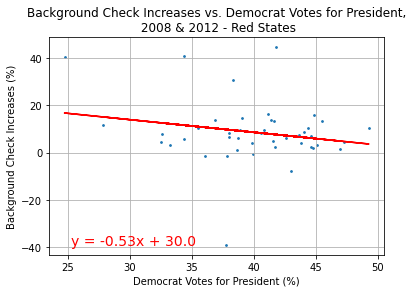

In [12]:
x_values = red["PercentD"]
y_values = red["pct"]

plt.scatter(red["PercentD"],red["pct"],s=3)
plt.title("Background Check Increases vs. Democrat Votes for President,\n 2008 & 2012 - Red States")
plt.ylabel("Background Check Increases (%)")
plt.xlabel("Democrat Votes for President (%)")
plt.grid()
slope, intercept, r_value, p_value, std_err = linregress(x_values,y_values)
plt.plot(x_values, intercept + slope*x_values, 'r')
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(min(x_values)+0.5,min(y_values)),fontsize=14,color="red")
plt.show()

In [13]:
print(f"The r-squared is {r_value * r_value}")

The r-squared is 0.04266531027667442
